## 1. Geometric Brownian Motion (GBM) Simulation of Stock Price

This notebook simulates a single path of a stock price over one year using the **Geometric Brownian Motion (GBM)** model, which is widely used in financial mathematics to model asset prices.

### Model Assumptions:
- The stock follows a stochastic process defined by the GBM:
  
  $$ dS_t = \mu S_t dt + \sigma S_t dW_t $$
  
  where:
  - \( S_t \): Stock price at time \( t \)
  - \( \mu \): Drift (expected return), here approximated by the risk-free rate
  - \( \sigma \): Volatility of the stock
  - \( W_t \): Wiener process (standard Brownian motion)

### Parameters Used:
- Initial stock price: 100
- Time horizon: 1 year
- Time steps: 180
- Risk-free rate: 1.65%
- Annual volatility: 7.9%

The resulting simulation plots the evolution of the stock price over the year.

---

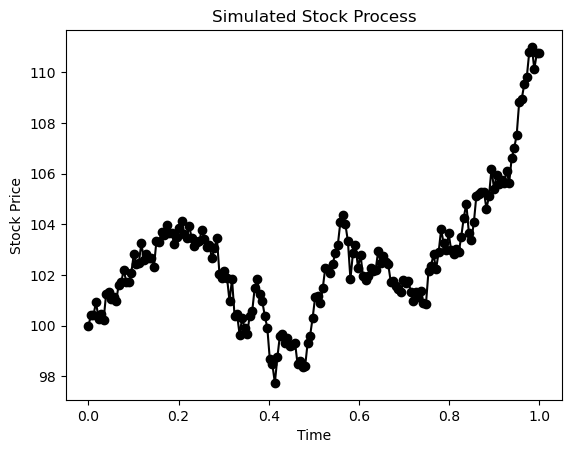

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter settings
num_steps = 180         # Divide the total period into 180 steps
initial_price = 100     # Initial stock price
time_horizon = 1.0      # Total time period (1 year)
risk_free_rate = 0.0165 # Annual risk-free interest rate
volatility = 0.079      # Annual volatility
delta_t = time_horizon / num_steps  # Time interval per step

# Create time axis
time_axis = np.linspace(0, time_horizon, num_steps)

# Initialize an array to store the stock price path
stock_path = np.zeros(num_steps)
stock_path[0] = initial_price

# Generate random numbers from standard normal distribution for stock fluctuations
random_shocks = np.random.normal(0, 1, num_steps)

# Simulate stock prices using Geometric Brownian Motion (GBM)
for i in range(num_steps - 1):
    drift = (risk_free_rate - 0.5 * (volatility**2)) * delta_t
    diffusion = volatility * np.sqrt(delta_t) * random_shocks[i]
    stock_path[i + 1] = stock_path[i] * np.exp(drift + diffusion)

# Plot the result
plt.plot(time_axis, stock_path, 'ko-')  # 'k' is black, 'o-' is line + circular markers
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Process')
plt.show()

## 2. GBM Simulation with Multiple Stock Price Paths

In this section, we simulate **50 independent paths** of a stock price over one year using the **Geometric Brownian Motion (GBM)** model. This approach helps visualize the stochastic nature of asset price movements under the same set of assumptions.

### Model Formula:
The stochastic differential equation for GBM is given by:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

- $ S_t $: Stock price at time \( t \)
- $ \mu $: Drift (risk-free rate in this case)
- $ \sigma $: Annual volatility
- $ W_t $: Standard Brownian motion (Wiener process)

### Parameters:
- Initial stock price: 100
- Number of paths: 50
- Time steps: 365 (daily granularity)
- Risk-free rate: 2.1%
- Volatility: 7.9%

Each path represents a possible future trajectory of the stock price based on the same statistical properties. The visualization gives insight into the **distribution of outcomes** over time, and how volatility impacts the dispersion of prices.

---


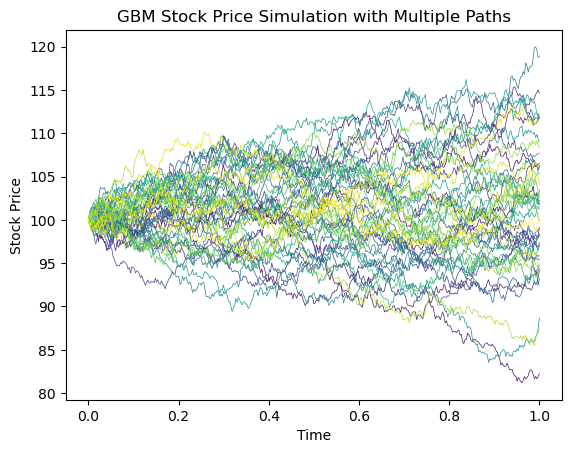

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter settings
num_days = 365            # Divide 1 year into 365 daily steps
total_time = 1.0          # Total time horizon (1 year)
risk_free_rate = 0.021    # Annual risk-free interest rate
volatility = 0.079        # Annual volatility
delta_t = total_time / num_days

# Number of simulation paths
num_paths = 50

# Initial stock price
initial_price = 100

# Generate the time grid
time_grid = np.linspace(0, total_time, num_days)

# Create color array for different paths using a colormap (e.g., 'viridis')
colors = plt.cm.viridis(np.linspace(0, 1, num_paths))

# Set axis labels
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Simulate and plot multiple stock price paths
for i in range(num_paths):
    # Initialize the stock price array for each path
    price_path = np.zeros(num_days)
    price_path[0] = initial_price

    # Generate random shocks from standard normal distribution
    random_shocks = np.random.normal(0, 1, num_days)

    # Generate stock path using Geometric Brownian Motion
    for j in range(num_days - 1):
        drift = (risk_free_rate - 0.5 * volatility**2) * delta_t
        diffusion = volatility * np.sqrt(delta_t) * random_shocks[j]
        price_path[j + 1] = price_path[j] * np.exp(drift + diffusion)

    # Plot each simulated path with a different color
    plt.plot(time_grid, price_path, linewidth=0.5, color=colors[i])

# Display the plot
plt.title('GBM Stock Price Simulation with Multiple Paths')
plt.show()


## 3. Distribution of Final Stock Prices (GBM Monte Carlo Simulation)

In this section, we simulate **10,000 stock price paths** using the **Geometric Brownian Motion (GBM)** model over one year and analyze the **distribution of final stock prices**.

Each path represents a possible realization of the stock price over time, and at the end of the simulation, we collect the final stock price from each path to build a histogram.

### Key Assumptions:
- Number of paths: 10,000
- Time horizon: 1 year (365 days)
- Initial price: 100
- Risk-free rate: 2.1%
- Volatility: 7.9%

### Objective:
To understand the **probabilistic spread of stock prices** at the end of one year, reflecting both the **mean shift due to drift** and the **variance due to volatility**.

This histogram provides insight into the **range of possible outcomes**, which is fundamental to option pricing, risk management, and scenario analysis.

---


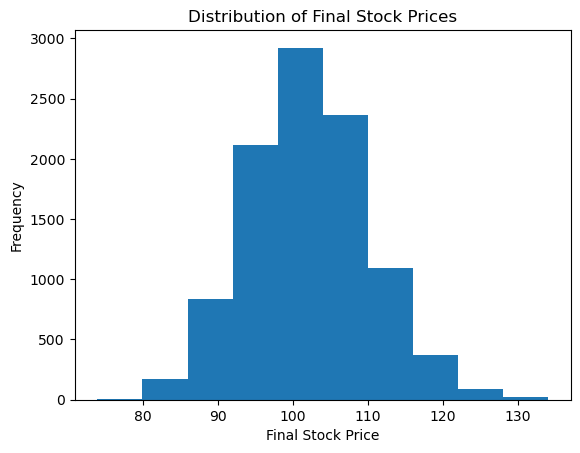

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_days = 365
num_paths = 10000

total_time = 1.0
risk_free_rate = 0.021
volatility = 0.079
delta_t = total_time / num_days

initial_price = 100

final_prices = []  # List to store final stock prices

for _ in range(num_paths):
    # 1) Generate a stock price path
    price = initial_price
    for i in range(num_days):
        z = np.random.normal()
        drift = (risk_free_rate - 0.5 * volatility**2) * delta_t
        diffusion = volatility * np.sqrt(delta_t) * z
        price = price * np.exp(drift + diffusion)
        
    # 2) Store the final price at the end of the path
    final_prices.append(price)

# 3) Visualize the distribution using a histogram
plt.hist(final_prices, bins=10)  
plt.xlabel('Final Stock Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Stock Prices')
plt.show()


## 4. Monte Carlo Simulation for ELS Pricing with Early Redemption and Knock-In Barrier

This section implements a **Monte Carlo simulation** to price an **Equity-Linked Security (ELS)**. The ELS is linked to a single underlying asset and features:

- **Early Redemption**: Possible at 6 observation dates depending on the underlying's performance relative to decreasing strike ratios.
- **Knock-In Barrier**: If the asset ever drops below 65% of its initial value and is not redeemed early, the final payoff is reduced.
- **Coupon Payments**: If early redemption occurs, the holder receives the principal plus a fixed coupon.

### Key Parameters:
- Initial stock price: 100
- Risk-free rate: 1.65%
- Volatility: 17.78%
- Face value: 10,000
- Knock-In Barrier: 65% of initial price
- Observation Dates: 6 dates between 2018-09-19 and 2021-03-19
- Coupon Rates: Increasing from 2.2% to 13.2%

### Monte Carlo Settings:
- Number of paths: 10,000
- Daily simulation with geometric Brownian motion
- Pricing based on discounted expected payoff across all scenarios

### Output Includes:
1. **Theoretical Price**: Computed using risk-neutral valuation.
2. **Probability Table**: Shows the likelihood of early redemption at each date, knock-in, or no event.
3. **Histogram**: Visual representation of redemption frequency and knock-in events.
4. **Path Visualization**: Shows 300 randomly selected simulated paths, with early redemption truncation and knock-in barrier overlay.

This model helps quantify the risk-return profile of structured products like ELS, especially under various market conditions and payoff structures.


[Random Sampling Plot] Monte Carlo ELS Pricing
Total simulations n=10000, Theoretical price = 9875.75

[Probability Table]
                 Event  Probability
 Redemption at Day 180       0.6591
 Redemption at Day 362       0.0964
 Redemption at Day 545       0.0441
 Redemption at Day 727       0.0433
 Redemption at Day 913       0.0185
Redemption at Day 1092       0.1386
              Knock-In       0.0844
         No Redemption      -0.0844


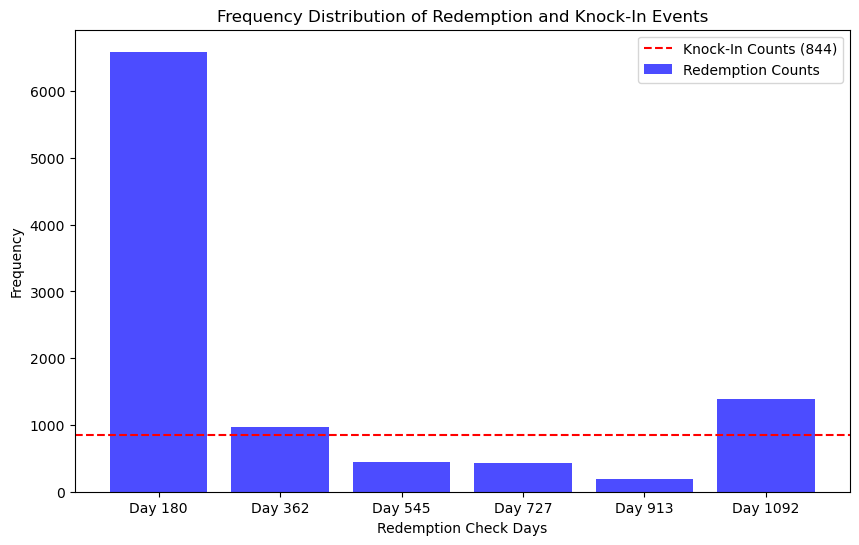

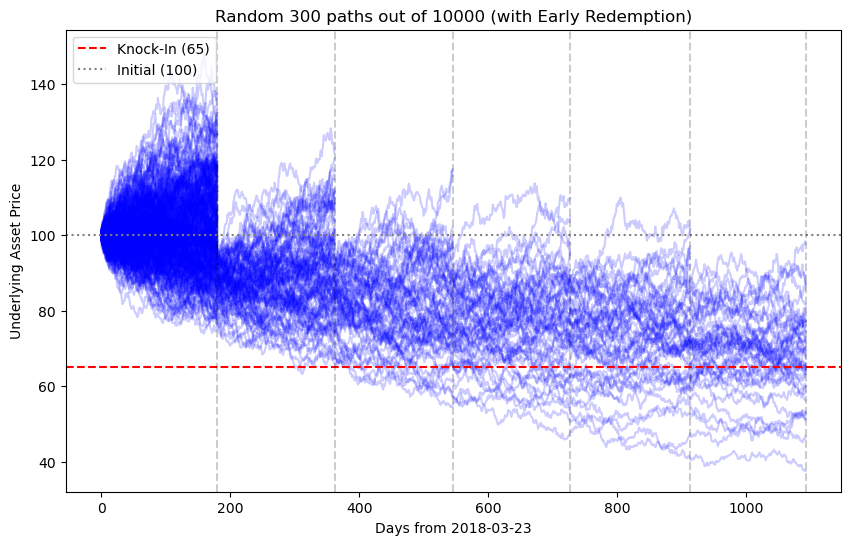

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd

# -----------------------------
# 1) Initial Settings (Same as Before)
# -----------------------------
n = 10000               # Number of Monte Carlo paths
r = 0.0165              # Annual risk-free interest rate
vol = 0.1778            # Annual volatility
facevalue = 10000       # Face value of the product

# Convert observation dates to ordinal (number of days)
n0 = date.toordinal(date(2018, 3, 23))  # Start date
n1 = date.toordinal(date(2018, 9, 19))
n2 = date.toordinal(date(2019, 3, 20))
n3 = date.toordinal(date(2019, 9, 19))
n4 = date.toordinal(date(2020, 3, 19))
n5 = date.toordinal(date(2020, 9, 21))
n6 = date.toordinal(date(2021, 3, 19))

check_day = np.array([n1 - n0, n2 - n0, n3 - n0, n4 - n0, n5 - n0, n6 - n0])
oneyear = 365
tot_date = n6 - n0      # Total simulation period in days
dt = 1 / oneyear        # Time step (daily)

S0 = 100.0              # Initial underlying price
strike_ratio = np.array([0.95, 0.95, 0.95, 0.90, 0.90, 0.85])
strike_price = strike_ratio * S0
coupon_rate = np.array([0.022, 0.044, 0.066, 0.088, 0.11, 0.132])
payment = facevalue * (1 + coupon_rate)
kib = 0.65 * S0         # Knock-in barrier
dummy = 0.132           # Final coupon if not knocked-in

# Arrays to store simulation results
S_all = np.zeros((n, tot_date + 1))          # All simulated price paths
redemption_day_all = np.full(n, -1, dtype=int)  # Redemption day index (-1 means none)
tot_payoff = np.zeros(len(strike_price))     # Total payoff vector
knock_in_events = 0                          # Counter for knock-in events

# -----------------------------
# Monte Carlo Simulation (with event tracking)
# -----------------------------
for i in range(n):
    S = np.zeros(tot_date + 1)
    S[0] = S0
    Z = np.random.normal(0, 1, size=tot_date)
    for j in range(tot_date):
        S[j + 1] = S[j] * np.exp((r - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * Z[j])
    S_all[i] = S
    
    S_check = S[check_day]                  # Prices on observation dates
    payoff_vec = np.zeros(len(strike_price))
    repay_event = False                    # Flag for early redemption
    
    for j2 in range(len(strike_price)):
        if S_check[j2] >= strike_price[j2]:
            payoff_vec[j2] = payment[j2]
            redemption_day_all[i] = check_day[j2]
            repay_event = True
            break
    
    if not repay_event:  # No early redemption
        redemption_day_all[i] = check_day[-1]
        if np.min(S) > kib:  # No knock-in occurred
            payoff_vec[-1] = facevalue * (1 + dummy)
        else:  # Knock-in occurred → payoff depends on final price
            payoff_vec[-1] = facevalue * (S[-1] / S0)
            knock_in_events += 1
    
    tot_payoff += payoff_vec

# Calculate theoretical price
mean_payoff = tot_payoff / n
discount_payoff = np.zeros(len(strike_price))
for j in range(len(strike_price)):
    Tj = check_day[j] / oneyear
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * Tj)
price = np.sum(discount_payoff)

print(f"[Random Sampling Plot] Monte Carlo ELS Pricing")
print(f"Total simulations n={n}, Theoretical price = {price:0.2f}")

# -----------------------------
# 3) Probability Table by Barrier Type
# -----------------------------
redemption_counts = np.zeros(len(check_day), dtype=int)
for day in redemption_day_all:
    if day in check_day:
        idx = np.where(check_day == day)[0][0]
        redemption_counts[idx] += 1

# Calculate probabilities
redemption_probs = redemption_counts / n
knock_in_prob = knock_in_events / n
no_redemption_prob = 1 - np.sum(redemption_probs) - knock_in_prob

# Create probability table
data = {
    "Event": [f"Redemption at Day {check_day[i]}" for i in range(len(check_day))] + ["Knock-In", "No Redemption"],
    "Probability": list(redemption_probs) + [knock_in_prob, no_redemption_prob]
}
df = pd.DataFrame(data)
print("\n[Probability Table]")
print(df.to_string(index=False))

# -----------------------------
# 4) Frequency Histogram of Redemption Events
# -----------------------------
plt.figure(figsize=(10, 6))
plt.bar(range(len(check_day)), redemption_counts, color='blue', alpha=0.7, label='Redemption Counts')
plt.axhline(y=knock_in_events, color='red', linestyle='--', label=f'Knock-In Counts ({knock_in_events})')
plt.xticks(range(len(check_day)), [f"Day {d}" for d in check_day])
plt.title("Frequency Distribution of Redemption and Knock-In Events")
plt.xlabel("Redemption Check Days")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# -----------------------------
# 2) Path Plot (Same as Before)
# -----------------------------
n_path_plot = 300
plot_indices = np.random.choice(n, n_path_plot, replace=False)

plt.figure(figsize=(10, 6))
alpha_line = 0.2
for idx in plot_indices:
    path_i = S_all[idx]
    red_day = redemption_day_all[idx]
    
    path_copy = path_i.copy()
    if 0 <= red_day < len(path_copy):
        path_copy[red_day + 1:] = np.nan  # Stop plotting after redemption
    
    plt.plot(path_copy, color='blue', alpha=alpha_line)

plt.axhline(y=kib, color='red', linestyle='--', label='Knock-In (65)')
plt.axhline(y=S0, color='gray', linestyle=':', label='Initial (100)')
for j in range(len(check_day)):
    plt.axvline(x=check_day[j], color='black', linestyle='--', alpha=0.2)

plt.title(f"Random {n_path_plot} paths out of {n} (with Early Redemption)")
plt.xlabel("Days from 2018-03-23")
plt.ylabel("Underlying Asset Price")
plt.legend(loc='upper left')
plt.show()


## 5. Historical ELS Valuation Using Real KOSPI Data (2018–2021)

In this section, we apply our **Monte Carlo-based ELS pricing model** to real historical data from the **KOSPI index** between **2018-03-23 and 2021-03-23**.

### Workflow Overview:

1. **Data Preparation**:
   - Load daily KOSPI index data from a CSV file.
   - Filter the date range to match the ELS product's life span.
   - Normalize the price series so that the issue date's closing price is scaled to 100.

2. **ELS Product Structure**:
   - Issue Date: 2018-03-23
   - Maturity Date: 2021-03-23
   - Early Redemption Dates: 6 predefined dates with descending barriers and increasing coupons.
   - Knock-In Barrier: 65% of issue price.
   - Final coupon if no knock-in: 13.2%
   - Notional (face value): 10,000 KRW

3. **Valuation Method**:
   - For each trading day in the period, the model:
     - Simulates the future path of the underlying asset via Geometric Brownian Motion.
     - Applies early redemption and knock-in logic.
     - Computes the discounted expected payoff (fair value).
   - The model is run for 3,000 Monte Carlo simulations per day.

4. **Results**:
   - A new column is added to the DataFrame: `ELS_FairValue`, which represents the fair value of the ELS on each day.
   - Two plots are shown:
     - KOSPI index level over time.
     - Daily ELS fair value estimated by the Monte Carlo simulation.

This simulation demonstrates how a structured product's theoretical price evolves in response to market movements. It is useful for **risk management**, **product design**, and **investor transparency**.

---


Preview of loaded KOSPI data:
        date     open     high      low    close     volume
0 2018-03-23  2446.73  2450.40  2412.62  2416.76  457953000
1 2018-03-26  2414.68  2437.08  2399.44  2437.08  306904000
2 2018-03-27  2455.00  2456.55  2444.92  2452.06  332129000
3 2018-03-28  2425.94  2430.77  2409.47  2419.29  501307000
4 2018-03-29  2421.70  2439.47  2413.71  2436.37  333359000 

          date     open     high      low    close      volume
731 2021-03-17  3067.76  3069.57  3027.20  3047.50   814990000
732 2021-03-18  3054.93  3090.19  3054.93  3066.01  1232596000
733 2021-03-19  3063.01  3063.01  3022.49  3039.53  1068468000
734 2021-03-22  3040.01  3048.11  3019.60  3035.46   915739000
735 2021-03-23  3038.25  3058.79  3003.05  3004.74  1331209000 

Issue date (2018-03-23) KOSPI closing price: 2416.76

=== ELS Fair Value Calculation Results (Top 10) ===
        date     open     high      low    close     volume  ELS_FairValue
0 2018-03-23  2446.73  2450.40  2412.62  2416.7

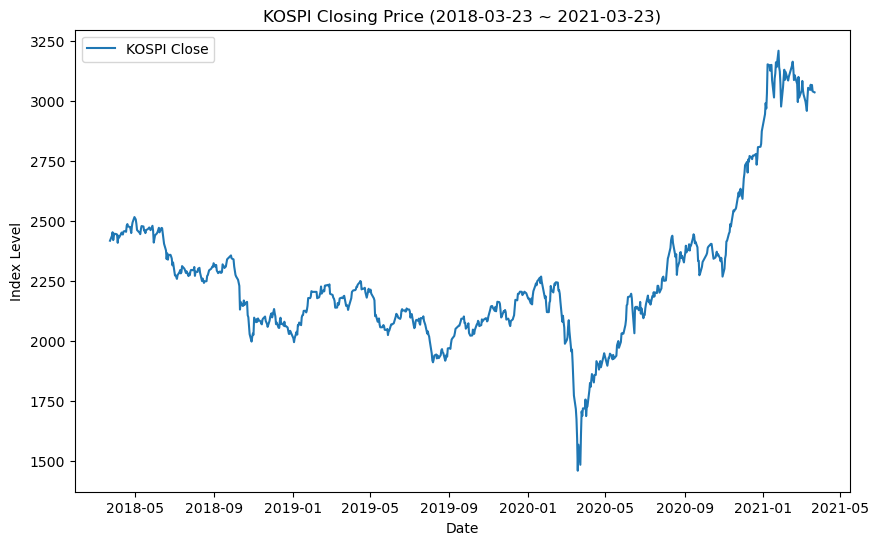

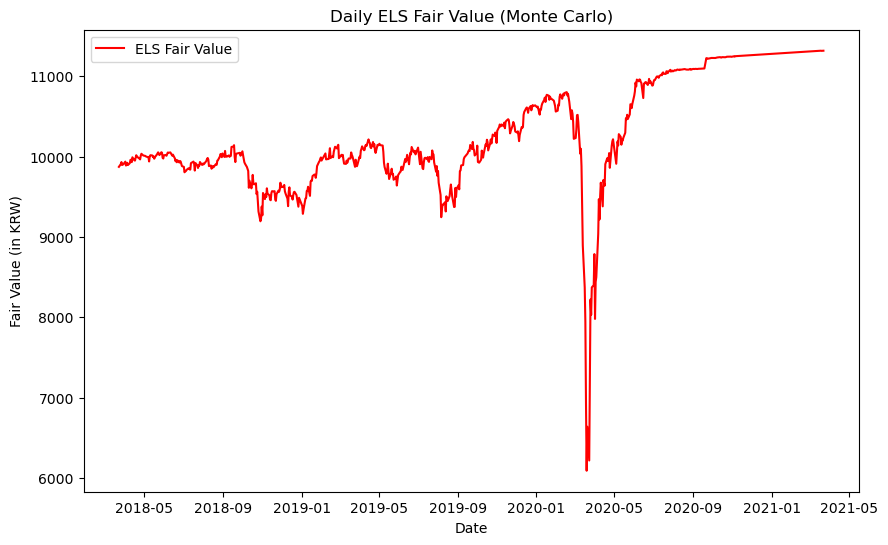

In [15]:
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

##############################
# 1) Load CSV Data
##############################
df = pd.read_csv("kospi_data_2018_2021.csv")  # Adjust filename if needed
# Expected columns: ['date', 'open', 'high', 'low', 'close', 'volume']

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for target period (2018-03-23 ~ 2021-03-23)
start_date = datetime(2018, 3, 23)
end_date   = datetime(2021, 3, 23)
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

# Sort by date
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)

print("Preview of loaded KOSPI data:")
print(df.head(), "\n")
print(df.tail(), "\n")

##############################
# 2) Define ELS Product Structure
##############################
issue_date = datetime(2018, 3, 23)
maturity_date = datetime(2021, 3, 23)

redemption_date_list = [
    datetime(2018, 9, 19),
    datetime(2019, 3, 20),
    datetime(2019, 9, 19),
    datetime(2020, 3, 19),
    datetime(2020, 9, 21),
    datetime(2021, 3, 19)
]
barrier_list = [0.95, 0.95, 0.95, 0.90, 0.90, 0.85]
coupon_list  = [0.022, 0.044, 0.066, 0.088, 0.11, 0.132]

knock_in_barrier = 65.0        # Knock-in threshold (based on initial price of 100)
dummy_coupon = 0.132           # Final coupon if held to maturity with no knock-in
facevalue = 10000              # Face value of the ELS

r   = 0.0165                   # Risk-free interest rate (annual)
vol = 0.1778                   # Annual volatility
n_sim = 3000                  # Number of Monte Carlo simulation paths

##############################
# 3) Monte Carlo ELS Pricing Function
##############################
def price_els_mc(S0, eval_date, maturity_date,
                 redemption_dates, barriers, coupons,
                 knock_in_barrier, dummy_coupon,
                 facevalue,
                 r=0.0165, vol=0.1778, n_sim=10000):
    """
    Monte Carlo-based fair value estimation for ELS.
    
    Parameters:
    - S0: Scaled price on evaluation date (100 = issue price)
    - eval_date: Evaluation date
    - maturity_date: Maturity date
    - redemption_dates: List of early redemption dates
    - barriers: Barrier levels for redemption (as a fraction of initial price)
    - coupons: Coupon rates
    - knock_in_barrier: Absolute barrier level for knock-in (e.g., 65)
    - dummy_coupon: Final coupon if no knock-in occurs
    - facevalue: Notional amount
    - r, vol: Interest rate and volatility
    - n_sim: Number of Monte Carlo paths
    """
    days_to_maturity = (maturity_date - eval_date).days
    if days_to_maturity <= 0:
        return 0.0  # Already matured

    dt = 1 / 365.0
    total_payoff = 0.0

    for i in range(n_sim):
        # Simulate price path
        S_path = np.zeros(days_to_maturity + 1)
        S_path[0] = S0
        Z = np.random.normal(0, 1, size=days_to_maturity)

        for d in range(days_to_maturity):
            S_path[d + 1] = S_path[d] * math.exp((r - 0.5 * (vol**2)) * dt + vol * math.sqrt(dt) * Z[d])

        # Check knock-in event
        knock_in_happened = (np.min(S_path) < knock_in_barrier)

        # Check for early redemption
        payoff = 0.0
        redeemed = False
        for rd_date, bar, cpn in zip(redemption_dates, barriers, coupons):
            if rd_date <= eval_date:
                continue  # Skip past dates
            day_idx = (rd_date - eval_date).days
            if day_idx < 0:
                continue
            if day_idx > days_to_maturity:
                break

            S_rd = S_path[day_idx]
            if S_rd >= bar * 100.0:  # Redemption triggered
                payoff = facevalue * (1 + cpn)
                T_yr = day_idx / 365.0
                pv = payoff * math.exp(-r * T_yr)
                total_payoff += pv
                redeemed = True
                break

        if not redeemed:
            # Maturity payoff
            if knock_in_happened:
                payoff = facevalue * (S_path[-1] / 100.0)
            else:
                payoff = facevalue * (1 + dummy_coupon)

            T_yr = days_to_maturity / 365.0
            pv = payoff * math.exp(-r * T_yr)
            total_payoff += pv

    avg_payoff = total_payoff / n_sim
    return avg_payoff

##############################
# 4) Scale Current Prices Based on Issue Date Close
##############################
issue_price_row = df[df['date'] == issue_date]
if len(issue_price_row) == 0:
    print("No data for issue date: using first available row instead")
    base_price = df.iloc[0]['close']
else:
    base_price = issue_price_row.iloc[0]['close']

print(f"Issue date (2018-03-23) KOSPI closing price: {base_price:.2f}\n")

##############################
# 5) Calculate Daily Fair Value of ELS
##############################
fair_values = []
dates_list = df['date'].tolist()
closes_list = df['close'].tolist()

for i in range(len(df)):
    current_date = dates_list[i]
    current_price = closes_list[i]

    # Scale price to match ELS structure (issue price = 100)
    scaled_S0 = (current_price / base_price) * 100.0

    fv = price_els_mc(
        S0=scaled_S0,
        eval_date=current_date,
        maturity_date=maturity_date,
        redemption_dates=redemption_date_list,
        barriers=barrier_list,
        coupons=coupon_list,
        knock_in_barrier=knock_in_barrier,
        dummy_coupon=dummy_coupon,
        facevalue=facevalue,
        r=r,
        vol=vol,
        n_sim=n_sim
    )
    fair_values.append(fv)

# Add results to DataFrame
df['ELS_FairValue'] = fair_values

print("=== ELS Fair Value Calculation Results (Top 10) ===")
print(df.head(10))

# Optional: save to CSV
# df.to_csv("ELS_valuation_daily.csv", index=False)

##############################
# 6) Basic Visualization
##############################
df_2 = df.iloc[:-1, :]

plt.figure(figsize=(10, 6))
plt.plot(df_2['date'], df_2['close'], label='KOSPI Close')
plt.title("KOSPI Closing Price (2018-03-23 ~ 2021-03-23)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_2['date'], df_2['ELS_FairValue'], label='ELS Fair Value', color='red')
plt.title("Daily ELS Fair Value (Monte Carlo)")
plt.xlabel("Date")
plt.ylabel("Fair Value (in KRW)")
plt.legend()
plt.show()
